# Импорт библиотек

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Считывание файла

In [111]:
df = pd.read_csv('dataset.csv')

# EDA - Разведывательный анализ данных.

In [6]:
df.shape

(114000, 21)

В датасете 114000 строк и 21 колонки.

Просмотрим информацию о датасете:

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113836 entries, 0 to 113999
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   113836 non-null  int64  
 1   track_id                     113836 non-null  object 
 2   artists                      113836 non-null  int64  
 3   album_name                   113836 non-null  object 
 4   track_name                   113836 non-null  object 
 5   popularity                   113836 non-null  int64  
 6   duration_ms                  113836 non-null  int64  
 7   explicit                     113836 non-null  int64  
 8   danceability                 113836 non-null  float64
 9   energy                       113836 non-null  float64
 10  key                          113836 non-null  int64  
 11  loudness                     113836 non-null  float64
 12  mode                         113836 non-null  int64  
 13  spee

Описание числовых признаков датасета:

In [69]:
df.describe()

,Unnamed: 0,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness_interaction,dance_valence
count,113836.000000,113836.000000,113836.000000,1.138360e+05,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000
mean,56944.035955,24.927457,33.233476,2.281096e+05,0.085623,0.567590,0.642112,5.309199,-8.239513,0.637496,0.084770,0.314642,0.155362,0.213228,0.474725,122.316220,3.909624,998.727239,-4.336482,0.290585
std,32891.943197,41.604858,22.316549,1.063084e+05,0.279808,0.172379,0.250786,3.559429,4.992758,0.480725,0.105762,0.332332,0.308884,0.189932,0.258841,29.653809,0.406909,11.966667,1.875415,0.197981
min,0.000000,1.000000,0.000000,1.580000e+04,0.000000,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,1.000000,862.000000,-33.694192,0.000000
25%,28463.750000,2.000000,17.000000,1.741980e+05,0.000000,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.430500,4.000000,1000.000000,-5.197014,0.123477
50%,56926.500000,9.000000,34.000000,2.130000e+05,0.000000,0.580000,0.685000,5.000000,-6.998000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000,1000.000000,-4.108140,0.258941
75%,85395.250000,27.000000,50.000000,2.615870e+05,0.000000,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.078000,4.000000,1000.000000,-3.224500,0.433030
max,113999.000000,279.000000,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1000.000000,4.527468,0.958432


In [70]:
#Вывод по тому что представляет собой датасет:
#у нас есть датасет с 21 колонкой:
#1 Unnamed: 0 = просто нумерует строки (тип число)
#2 track_id = айди трека (тип строка)
#3 artists = имя музыкантов (тип строка)
#4 album_name = название альбома (тип строка)
#5 track_name = название трека (тип строка)
#6 popularity = популярность (тип число, min знычение -- 0, max -- 100)
#7 duration_ms = продолжительность трека в мс (тип число, min значение -- 0, max -- 5.237295e+06)
#8 explict = откровенность (булевой тип)
#9 danceability = танцевальность (тип число с плавающей точкой, min значение -- 0, max -- 1)
#10 energy = энергичность (тип число с плавающей точкой, min значение -- 0, max -- 1)
#11 key = тональность (тип число, min значение -- 0, max -- 11)
#12 loudness = громкость (тип число с плавающей точкой, min значение -- -49.531000, max -- 4.532000)
#13 mode = лад (тип число от 0 до 1)
#14 speechiness = присутствие текста (тип число с плавающей точкой, min значение -- 0.000000, max -- 0.965000)
#15 acousticness = акустика (тип число с плавающей точкой, min значение -- 0.000000, max -- 0.996000)
#16 instrumentalness = иструментальность (тип число с плавающей точкой, min значение -- 0.000000, max -- 1.000000)
#17 liveness = живое исполнение (тип число с плавающей точкой, min значение -- 0.000000, max -- 1.000000)
#18 valence = насколько трек позиттивный (тип число с плавающей точкой, min значение -- 0.000000, max -- 0.995000)
#19 tempo = темп (тип число с плавающей точкой, min значение -- 0.000000, max -- 243.372000)
#20 time_signature = размер (тип число, min значение -- 0, max -- 5)
#21 track_genre = жанр трека (тип строка)

Просмотрим наличие дубликатов:

In [71]:
df.loc[df.duplicated()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness_interaction,dance_valence


Дубликатов нет.

Далее просмотрим сумму пустых значений в каждом столбце:

In [112]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Так как пустых строк пренебрежимо мало, удалим найденные строки и выведем измененный результат:

In [113]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

Оценим то, какие у нас есть категориальные и численные столбцы

In [82]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['track_id', 'artists', 'album_name', 'track_name', 'track_genre'] 
 Число столблцов =  5
Числовые данные:	  ['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'] 
 Число столблцов =  16


<Axes: >

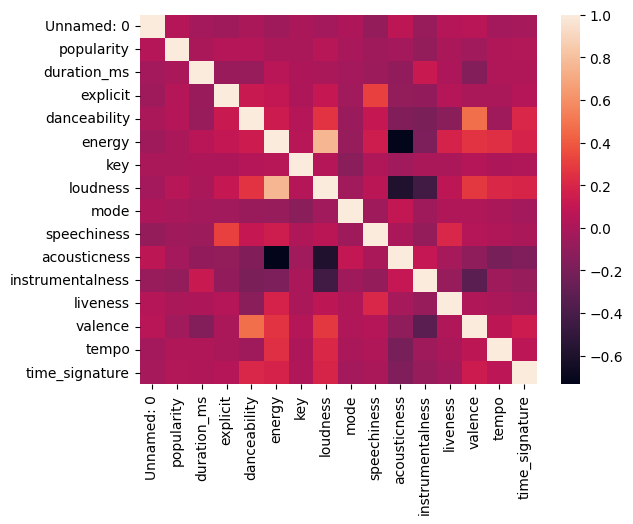

In [8]:
sns.heatmap(df.corr(numeric_only=True))

Из тепловой карты можно заметить корреляцию между признаками 'loudness' и 'energy'. Также менее выраженную корреляцию можно наблюдать между 'danceability' 'valence'.
Обратную корреляцию можно наблюдать между 'acousticness' и 'energy' с 'loudness', 'instrumentalness' и 'loudness'.

Рассмотрим гистограммы (распределение) значений по каждому числовому признаку:

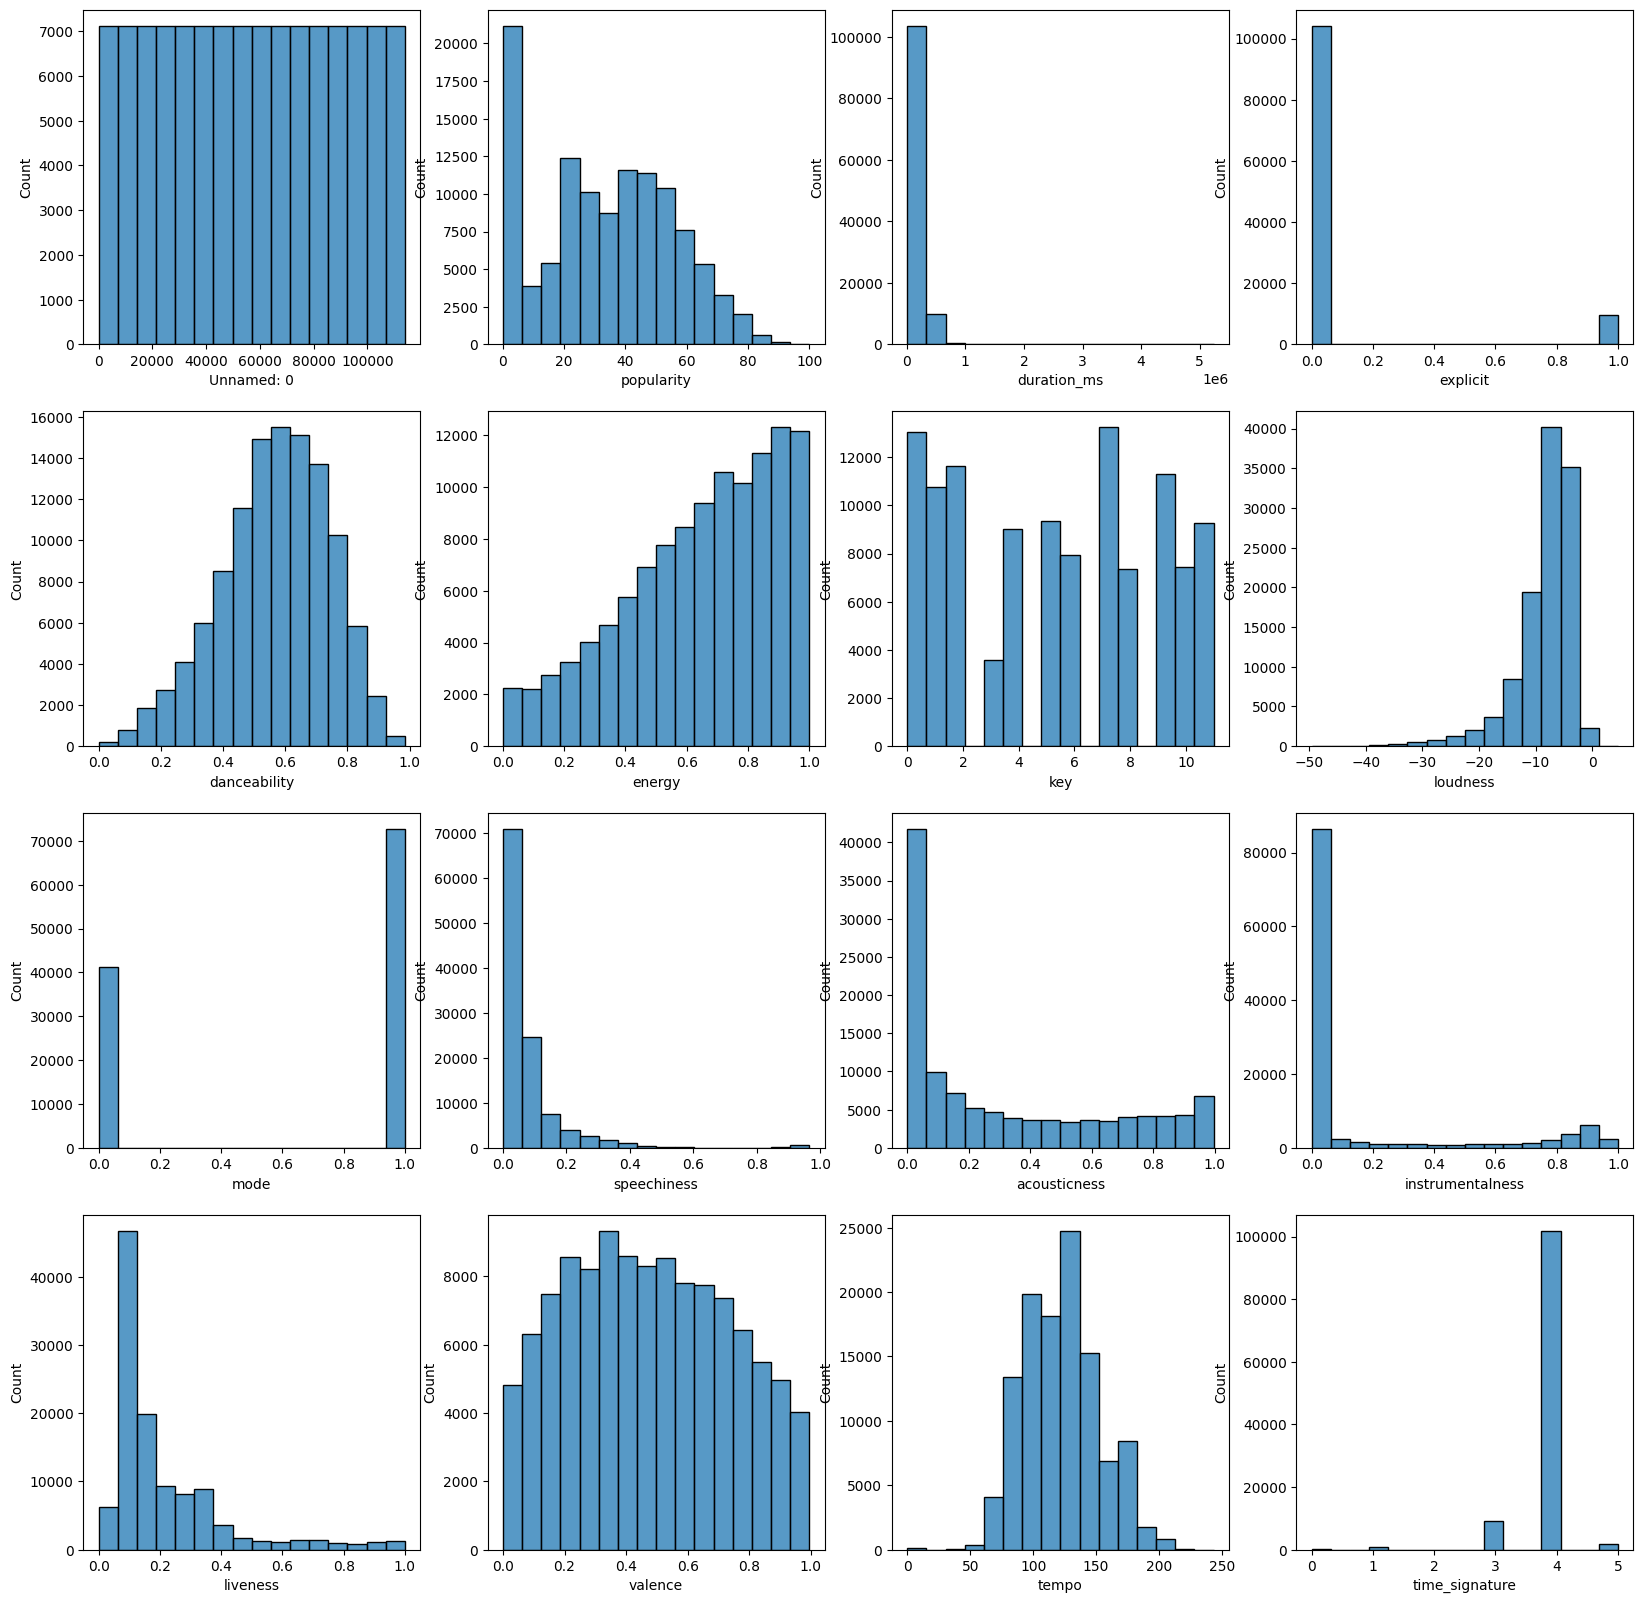

In [11]:
width = 4
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,20))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name,
            bins = 16);

Столбцы имеют аномалии, например, `popularity`, `duration_ms` и `time_signature`. Чтобы лучше понять эти аномалии посмотрим на столбцы поближе.

`Unnamed`является просто нумеровкой строк и не имеет влиянии.

Начнем с `popularity`.

<Axes: xlabel='popularity', ylabel='Count'>

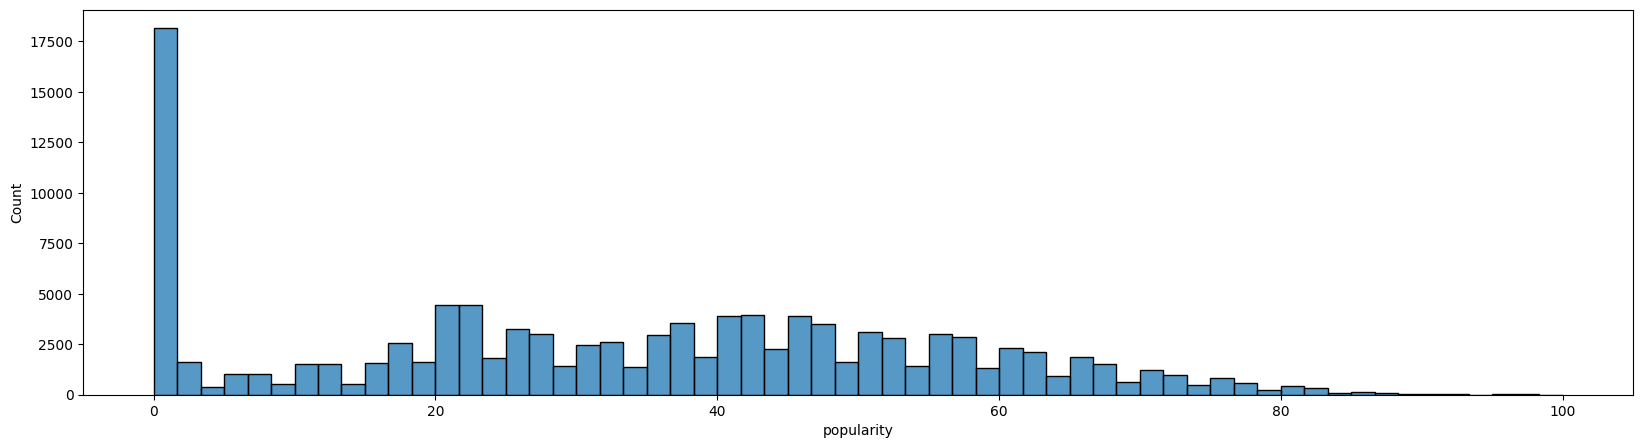

In [77]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='popularity',
             bins = 60)

В логарифимическом мастштабе:

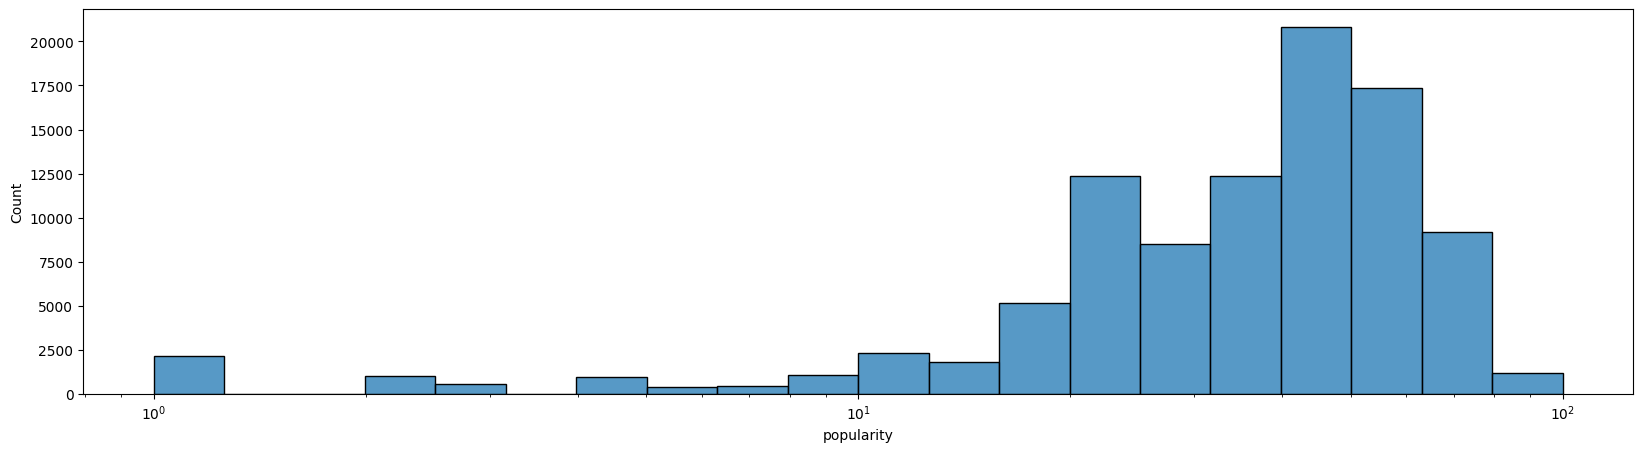

In [78]:
plt.figure(figsize=(20,5)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='popularity', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

Заметим, что у нас много объектов, `popularity` которых равна 0. Следовательно многие треки не прослушиваются никогда.

Почистим столбцы с `time_signature` и `duration`, а именно уберем данные, значения которых равны 0, так как это пустые треки.

In [114]:
#time_signature
question_dist = df[df.time_signature == 0]
df = df.drop(question_dist.index)

#duration
question_dist = df[df.duration_ms == 0]
df = df.drop(question_dist.index)

Оценим, насколько у нас сократилось количество данных после внесенных изменений и как изменились гистограммы.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113836 entries, 0 to 113999
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   113836 non-null  int64  
 1   track_id                     113836 non-null  object 
 2   artists                      113836 non-null  int64  
 3   album_name                   113836 non-null  object 
 4   track_name                   113836 non-null  object 
 5   popularity                   113836 non-null  int64  
 6   duration_ms                  113836 non-null  int64  
 7   explicit                     113836 non-null  int64  
 8   danceability                 113836 non-null  float64
 9   energy                       113836 non-null  float64
 10  key                          113836 non-null  int64  
 11  loudness                     113836 non-null  float64
 12  mode                         113836 non-null  int64  
 13  spee

Количество данных изменилось не критически.

# Feature Engineering

In [115]:
from sklearn.preprocessing import MinMaxScaler

Добавим новый признак energy_loudness, который объединяет в себе energy' и 'loudness', т.к. между ними есть заметная корреляция.Аналогично с 'danceability' и 'valence'

In [116]:
df['energy_loudness'] = df['energy'] * df['loudness']
df['dance_valence'] = df['danceability'] * df['valence']

Закодируем некоторые категориальные признаки, чтобы в дальнейшем нам было удобнее с ними работать.

In [118]:
# Кодирование категориальных признаков
df['explicit'] = df['explicit'].astype(int)  # True/False -> 1/0
genre_counts = df['track_genre'].value_counts()
df['track_genre'] = df['track_genre'].map(genre_counts)
artists_counts = df['artists'].value_counts()
df['artists'] = df['artists'].map(artists_counts)

Тепловая карта с учетом новых признаков.

<Axes: >

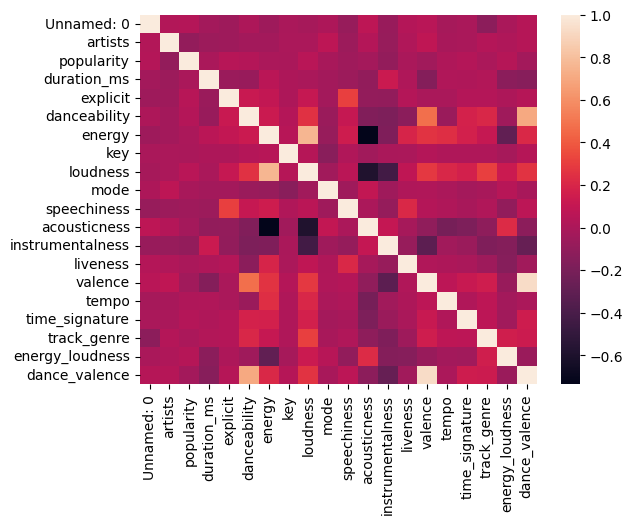

In [86]:
sns.heatmap(df.corr(numeric_only=True))

In [119]:
scaler = MinMaxScaler()
num_data = df.select_dtypes(exclude=['object', 'bool'])
nonnum_data = df.select_dtypes(include=['object', 'bool'])
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113836 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113836 non-null  int64  
 1   artists           113836 non-null  int64  
 2   popularity        113836 non-null  int64  
 3   duration_ms       113836 non-null  int64  
 4   explicit          113836 non-null  int64  
 5   danceability      113836 non-null  float64
 6   energy            113836 non-null  float64
 7   key               113836 non-null  int64  
 8   loudness          113836 non-null  float64
 9   mode              113836 non-null  int64  
 10  speechiness       113836 non-null  float64
 11  acousticness      113836 non-null  float64
 12  instrumentalness  113836 non-null  float64
 13  liveness          113836 non-null  float64
 14  valence           113836 non-null  float64
 15  tempo             113836 non-null  float64
 16  time_signature    113836 

In [120]:
nonnum_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113836 entries, 0 to 113999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   track_id    113836 non-null  object
 1   album_name  113836 non-null  object
 2   track_name  113836 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


In [89]:
scaled_df = scaler.fit_transform(num_data)
print(scaled_df)

[[0.00000000e+00 3.23741007e-02 7.30000000e-01 ... 1.00000000e+00
  8.00182043e-01 5.04302861e-01]
 [8.77200677e-06 4.31654676e-02 5.50000000e-01 ... 1.00000000e+00
  8.06693953e-01 1.17003606e-01]
 [1.75440135e-05 0.00000000e+00 5.70000000e-01 ... 1.00000000e+00
  7.90119686e-01 5.48395713e-02]
 ...
 [9.99982456e-01 4.67625899e-02 2.20000000e-01 ... 9.78260870e-01
  7.87766335e-01 4.87616232e-01]
 [9.99991228e-01 1.04316547e-01 4.10000000e-01 ... 9.78260870e-01
  7.37392306e-01 2.52945436e-01]
 [1.00000000e+00 4.67625899e-02 2.20000000e-01 ... 9.78260870e-01
  7.51533136e-01 3.88559647e-01]]


In [121]:
num_df = pd.DataFrame(scaled_df, columns = ['Unnamed: 0', 'artists',	'popularity',	'duration_ms', 'explicit', 'danceability',	'energy',	'key',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo',	'time_signature', 'track_genre', 'energy_loudness', 'dance_valence'])

Объединяем два DataFrame обратно в один.

In [122]:
df = pd.concat([num_df, nonnum_data], axis=1)
df.isna().sum()
df = df.dropna()

In [21]:
df.tail(3)

,Unnamed: 0,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,time_signature,track_genre,energy_loudness,dance_valence,track_id,album_name,track_name
113833,0.999982,0.046763,0.22,0.048964,0.0,0.618721,0.328986,0.000000,0.698238,0.0,...,0.075347,0.746734,0.479322,0.75,0.978261,0.787766,0.487616,7HMaIo455cDTQceGXDUUMk,This Is Jesus Culture (Live),Show Me Your Glory - Live
113834,0.999991,0.104317,0.41,0.051344,0.0,0.573739,0.505990,0.636364,0.698355,1.0,...,0.263184,0.415075,0.496125,0.75,0.978261,0.737392,0.252945,7FllOr2AVNe64yqEKmPjGy,Música para Acostarse - 30 Canciones Relajante...,Profunda Relajacion del Ser
113835,1.000000,0.046763,0.22,0.043288,0.0,0.508407,0.486990,0.090909,0.711754,0.0,...,0.080797,0.711558,0.229852,0.75,0.978261,0.751533,0.388560,3eiEcBQ9QBHyDmCwuoQXLZ,This Is Our God (Live),Healer


In [22]:
df.describe()

,Unnamed: 0,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness,dance_valence
count,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000,113673.000000
mean,0.499029,0.086073,0.332324,0.040656,0.085737,0.553383,0.642399,0.482788,0.750523,0.637399,0.066487,0.315495,0.154761,0.205739,0.477562,0.432252,0.727534,0.991753,0.768209,0.303503
std,0.288377,0.149659,0.223176,0.020130,0.279977,0.184235,0.250458,0.323562,0.097050,0.480753,0.112210,0.333432,0.308311,0.191484,0.259918,0.139056,0.101353,0.081007,0.048378,0.206471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249371,0.003597,0.170000,0.030348,0.000000,0.434508,0.472989,0.181818,0.715999,0.000000,0.014636,0.016867,0.000000,0.089478,0.262312,0.325146,0.750000,1.000000,0.745613,0.129120
50%,0.498724,0.028777,0.340000,0.037770,0.000000,0.567313,0.684994,0.454545,0.774602,1.000000,0.028529,0.168675,0.000041,0.123896,0.466332,0.430770,0.750000,1.000000,0.774060,0.270452
75%,0.748182,0.093525,0.500000,0.047078,0.000000,0.689408,0.853997,0.727273,0.813587,1.000000,0.066285,0.598394,0.046900,0.266212,0.687437,0.515457,0.750000,1.000000,0.797137,0.452118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Удалим ненужные нам признаки - `Unnamed`, `track_id`, Эти признаки лишь нумеруют строки и никак не влияют на популярность. Также удалим `track_name` и `album_name`, так как у них слишком много уникальных значений слабо влияющих на популярность.

In [123]:
df = df.drop(columns = ['Unnamed: 0', 'track_id', 'track_name', 'album_name'])

In [124]:
df = df.dropna()

Проведем Feature Importances на примере модели Random Forest.

R2 score on train set: 0.9125720300696755
R2 score on test set: 0.5740448340793225
Feature Importances:
             Feature  Importance
0            artists    0.098815
1        duration_ms    0.085221
9       acousticness    0.082915
3       danceability    0.076785
8        speechiness    0.075208
13             tempo    0.073675
4             energy    0.068534
11          liveness    0.065988
10  instrumentalness    0.063647
16   energy_loudness    0.061902
12           valence    0.058512
6           loudness    0.057929
17     dance_valence    0.057117
5                key    0.030620
15       track_genre    0.023555
7               mode    0.007541
2           explicit    0.007297
14    time_signature    0.004739


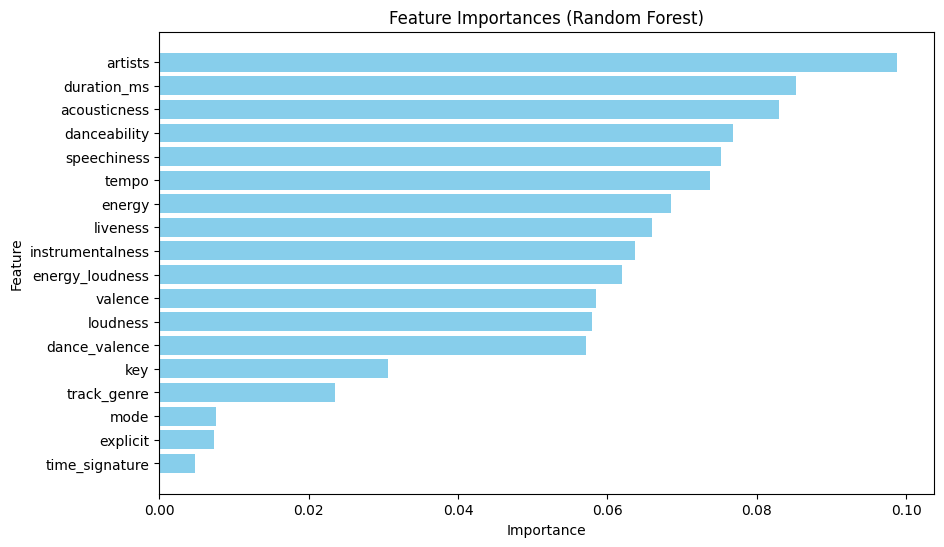

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Разделение на X и y
X = df.drop('popularity', axis=1)  # Признаки
y = df['popularity']  # Целевая переменная

# Масштабирование не требуется для Random Forest

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Шаг 2: Простая модель - Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Оценка качества модели
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on train set: {r2_train}")
print(f"R2 score on test set: {r2_test}")

# Шаг 3: Feature Importances
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_rf)

# Шаг 4: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Feature'], feature_importances_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

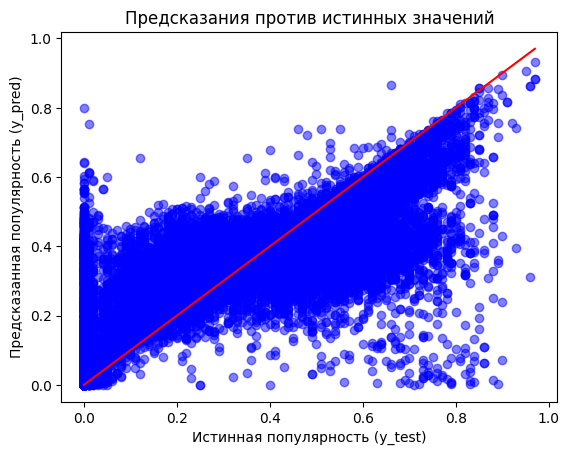

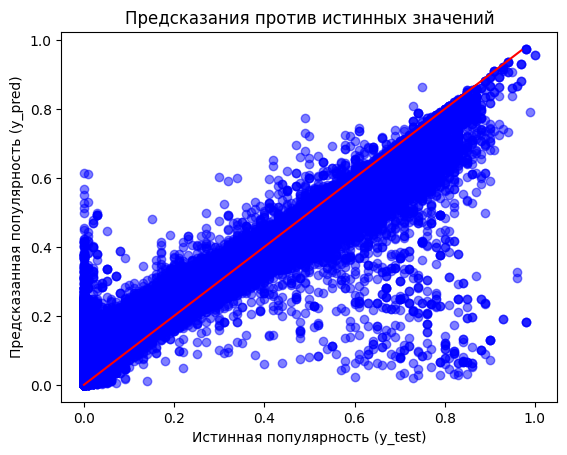

In [95]:
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

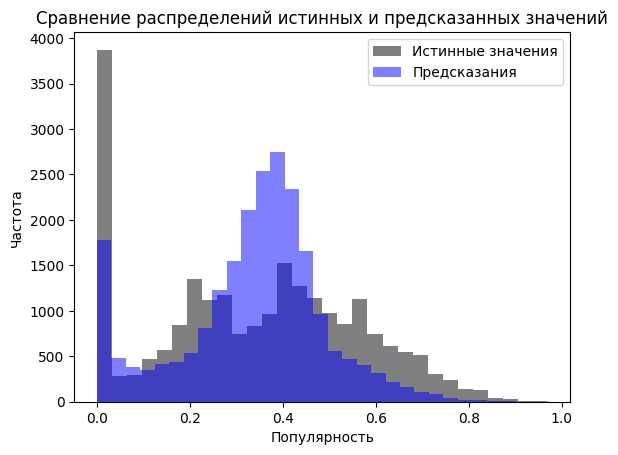

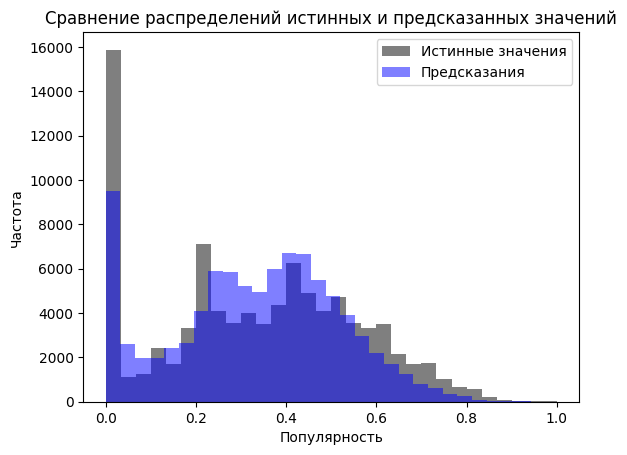

In [96]:
plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_test_pred, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

plt.hist(y_train, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_train_pred, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

Мы видим, что `explicit`, `mode` и `time_signature` имеют сравнительно мало влияния. Самое же сильное влияние оказывают `artists`, `duration_ms`, `acoustickness`. Наши новые показатели оказывают среднее влияние.

In [97]:
#df = df.drop(columns = ['explicit', 'mode', 'time_signature'])

# Эксперименты с моделями

In [148]:
X = df.drop(columns = 'popularity')
print(X)

         artists  duration_ms  explicit  danceability    energy       key  \
0       0.032374     0.041150       0.0      0.669059  0.460989  0.090909   
1       0.043165     0.025627       0.0      0.394881  0.165983  0.090909   
2       0.000000     0.037351       0.0      0.414159  0.358987  0.000000   
3       0.050360     0.035647       0.0      0.229945  0.059581  0.000000   
4       0.035971     0.035058       0.0      0.606940  0.442989  0.181818   
...          ...          ...       ...           ...       ...       ...   
113831  0.010791     0.070708       0.0      0.129271  0.234985  0.454545   
113832  0.010791     0.070708       0.0      0.131413  0.116982  0.000000   
113833  0.046763     0.048964       0.0      0.618721  0.328986  0.000000   
113834  0.104317     0.051344       0.0      0.573739  0.505990  0.636364   
113835  0.046763     0.043288       0.0      0.508407  0.486990  0.090909   

        loudness  mode  speechiness  acousticness  instrumentalness  livene

In [149]:
y = df['popularity']
print(y)

0         0.73
1         0.55
2         0.57
3         0.71
4         0.82
          ... 
113831    0.21
113832    0.22
113833    0.22
113834    0.41
113835    0.22
Name: popularity, Length: 113673, dtype: float64


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression()

In [135]:
log_reg.fit(X_train, y_train)

LinearRegression()

In [136]:
y_predict_train = log_reg.predict(X_test)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict_train)
mse = mean_squared_error(y_test, y_predict_train)
r2 = r2_score(y_test, y_predict_train)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.1815236321679906
MSE: 0.047695879983024894
R²: 0.0426215046498758


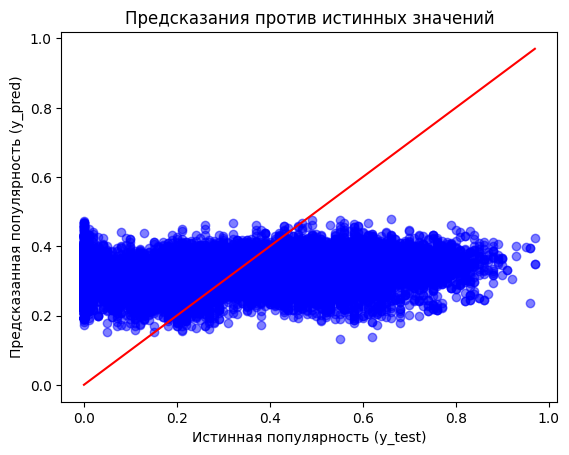

In [138]:
plt.scatter(y_test, y_predict_train, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

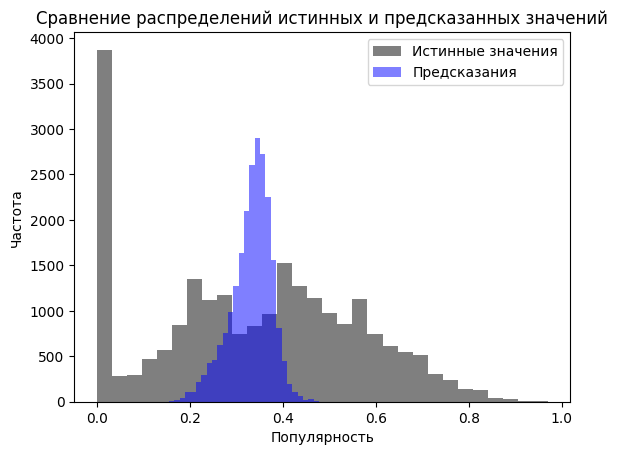

In [139]:
plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_train, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

In [140]:
coefficients = log_reg.coef_.reshape(-1)
lr_df = pd.DataFrame(data={'Feature': X.columns, 'Importance': np.abs(coefficients)})
lr_df = lr_df.sort_values(by='Importance', ascending=False)
print(lr_df)

             Feature  Importance
17     dance_valence    0.329712
3       danceability    0.198752
0            artists    0.147483
8        speechiness    0.140627
12           valence    0.123652
15       track_genre    0.100904
10  instrumentalness    0.081104
1        duration_ms    0.061366
14    time_signature    0.055116
6           loudness    0.052090
16   energy_loudness    0.046479
4             energy    0.037671
2           explicit    0.032915
13             tempo    0.026849
11          liveness    0.012752
9       acousticness    0.009292
7               mode    0.005211
5                key    0.003457


Можно заметить, что важность признаков для разных модлей может различаться.

Модель линейной регрессии работает очень быстро, но объясняет всего 4.26% вариации зависимой переменной popularity.

In [150]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_predict_train = decision_tree.predict(X_test)

In [151]:
mae = mean_absolute_error(y_test, y_predict_train)
mse = mean_squared_error(y_test, y_predict_train)
r2 = r2_score(y_test, y_predict_train)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.12390607326038125
MSE: 0.04012850910701525
R²: 0.1945180237120866


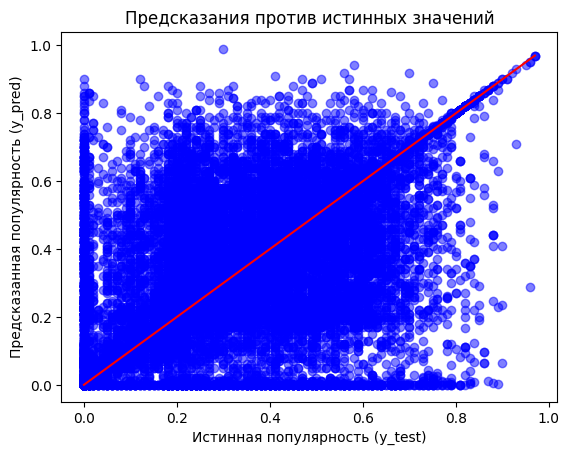

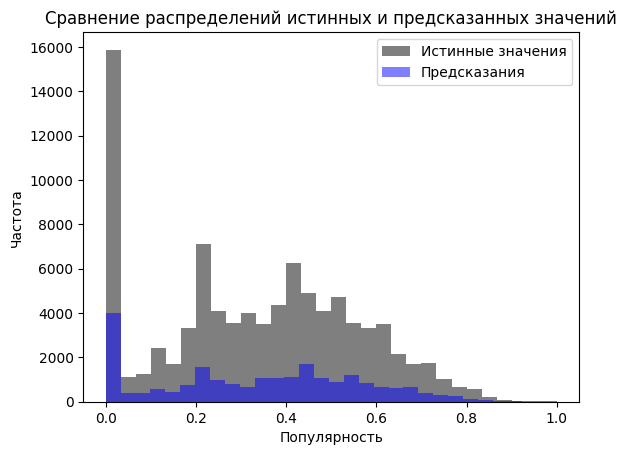

In [153]:
plt.scatter(y_test, y_predict_train, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()


plt.hist(y_train, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_train, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

Эта модель уже лучше справляется и объясняет около 19.45% вариации в данных и все еще достаточно быстро работает.

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor # type: ignore
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

In [156]:
# Разделение на X и y
X = df.drop('popularity', axis=1)  # Признаки
y = df['popularity']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
xgb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=42)

xgb_model.fit(X_train, y_train)

y_predict_train = xgb_model.predict(X_train)
y_predict_test = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_predict_test)
mse = mean_squared_error(y_test, y_predict_test)
r2 = r2_score(y_test, y_predict_test)
r2_train = r2_score(y_train, y_predict_train)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"R² train: {r2_train}")

MAE: 0.09467609318437356
MSE: 0.022448312522441807
R²: 0.5494048611005062
R² train: 0.9636718878655912


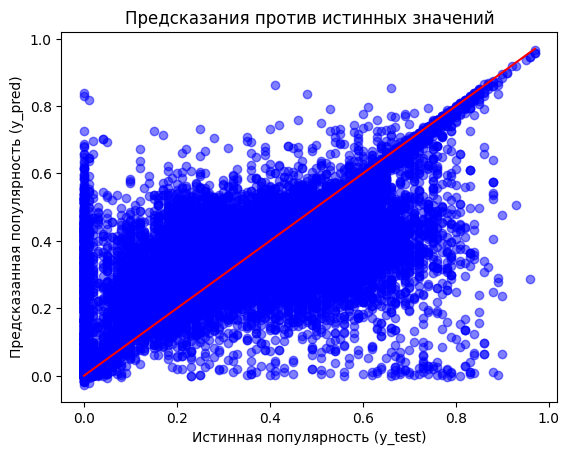

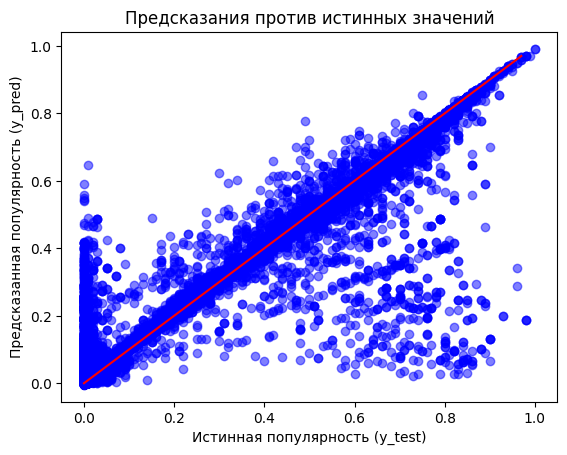

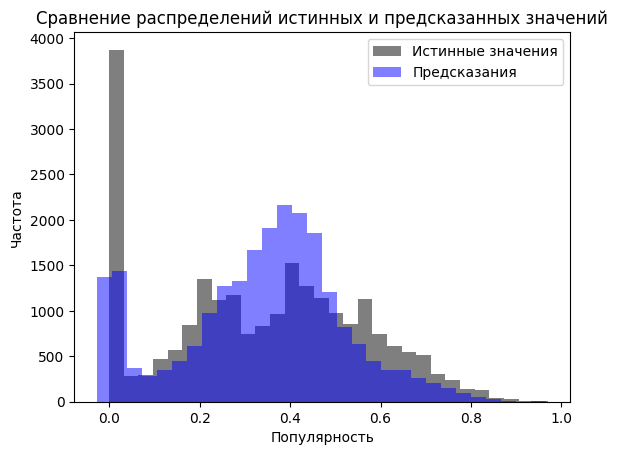

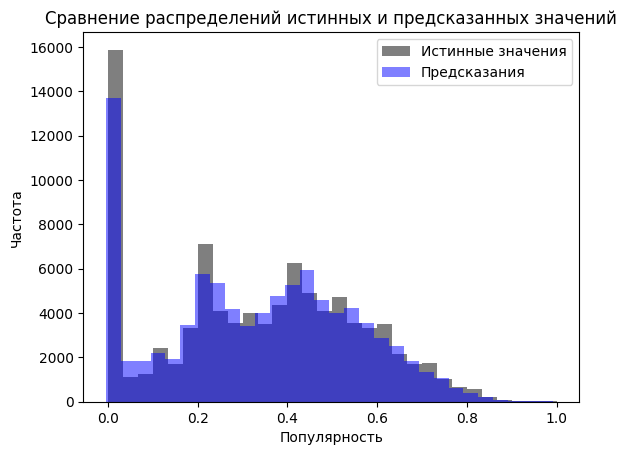

In [157]:
plt.scatter(y_test, y_predict_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

plt.scatter(y_train, y_predict_train, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_test, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

plt.hist(y_train, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_train, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

In [158]:
# Разделение на X и y
X = df.drop('popularity', axis=1)  # Признаки
y = df['popularity']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50, ), activation='relu', solver='lbfgs', max_iter=1000, random_state=42, alpha=0.05)

mlp.fit(X_train, y_train)

y_predict_train = mlp.predict(X_train)
y_predict_test = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_predict_test)
mse = mean_squared_error(y_test, y_predict_test)
r2 = r2_score(y_test, y_predict_test)
r2_train = r2_score(y_train, y_predict_train)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"R² train: {r2_train}")

C:\Users\79049\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 0.165791741278155
MSE: 0.042183028559503746
R²: 0.15327855517117617
R² train: 0.17201054918011138


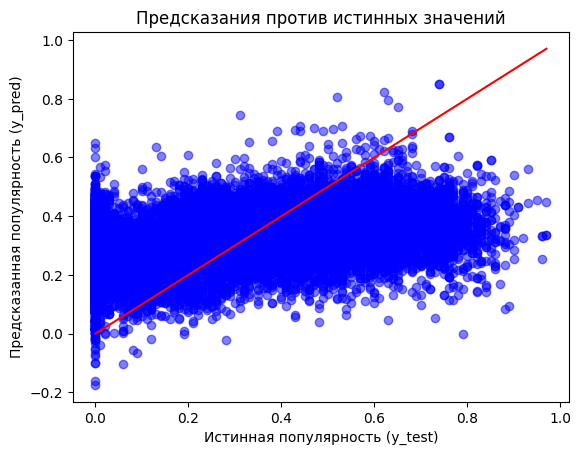

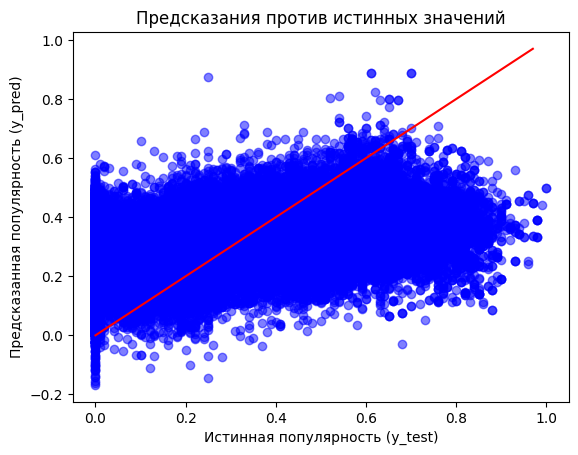

In [159]:
plt.scatter(y_test, y_predict_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

plt.scatter(y_train, y_predict_train, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()


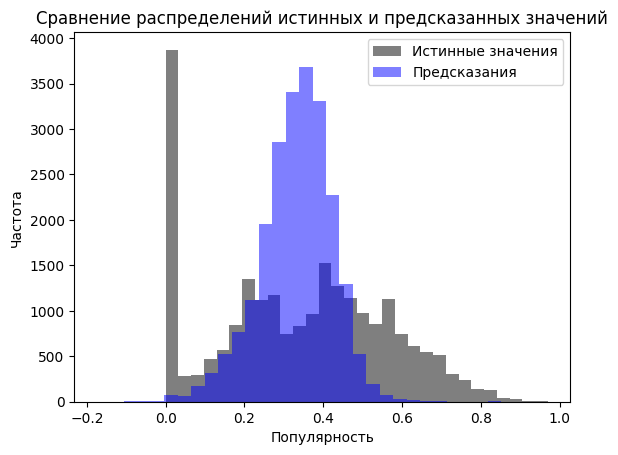

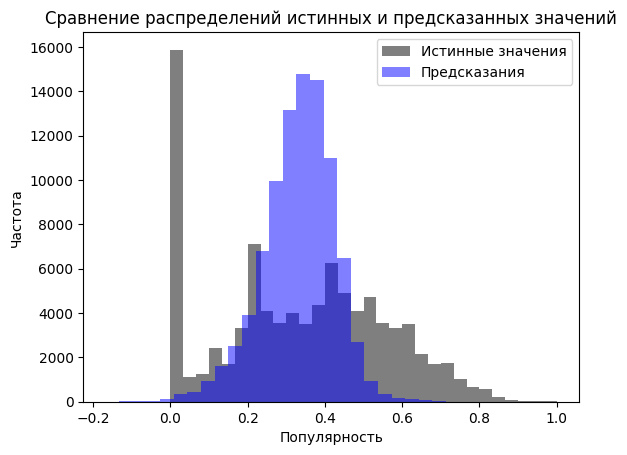

In [160]:
plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_test, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

plt.hist(y_train, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_train, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

In [161]:
# Словарь моделей
models = {
    "Линейная регрессия": log_reg,
    "Дерево решений": decision_tree,
    "Градиентный бустинг": xgb_model,
    "Нейронная сеть": mlp
}

In [162]:
# Кросс-валидация с 5 фолдами
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Словарь для хранения результатов
results = {"MSE": {}, "MAE": {}, "R2": {}}

# Оценка моделей
for model_name, model in models.items():
    print(f"Оценка модели: {model_name}")

    # Кросс-валидация для MSE
    mse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    results["MSE"][model_name] = -mse_scores.mean()  # Скользящий знак для MSE

    # Кросс-валидация для MAE
    mae_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    results["MAE"][model_name] = -mae_scores.mean()  # Скользящий знак для MAE

    # Кросс-валидация для R²
    r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    results["R2"][model_name] = r2_scores.mean()

    print(f"MSE для {model_name}: {-mse_scores.mean():.4f}")
    print(f"MAE для {model_name}: {-mae_scores.mean():.4f}")
    print(f"R² для {model_name}: {r2_scores.mean():.4f}\n")

Оценка модели: Линейная регрессия
MSE для Линейная регрессия: 0.0479
MAE для Линейная регрессия: 0.1819
R² для Линейная регрессия: 0.0386

Оценка модели: Дерево решений
MSE для Дерево решений: 0.0444
MAE для Дерево решений: 0.1340
R² для Дерево решений: 0.1079

Оценка модели: Градиентный бустинг
MSE для Градиентный бустинг: 0.0245
MAE для Градиентный бустинг: 0.1012
R² для Градиентный бустинг: 0.5076

Оценка модели: Нейронная сеть


C:\Users\79049\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\79049\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res,

MSE для Нейронная сеть: 0.0424
MAE для Нейронная сеть: 0.1661
R² для Нейронная сеть: 0.1481



C:\Users\79049\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [163]:
# Выводим результаты
print("Результаты кросс-валидации для каждой модели:")
for metric in results:
    print(f"\nМетрика: {metric}")
    for model_name, score in results[metric].items():
        print(f"{model_name}: {score:.4f}")

# Выбираем лучшую модель по MSE или R²
best_model_name_mse = min(results["MSE"], key=results["MSE"].get)
best_model_mse = models[best_model_name_mse]

best_model_name_r2 = max(results["R2"], key=results["R2"].get)
best_model_r2 = models[best_model_name_r2]

print(f"\nЛучшая модель по MSE: {best_model_name_mse}")
print(f"Лучшая модель по R²: {best_model_name_r2}")

# Обучаем лучшую модель по MSE и оцениваем её на тестовых данных
best_model_mse.fit(X_train, y_train)
y_pred_mse = best_model_mse.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_mse)
final_mae = mean_absolute_error(y_test, y_pred_mse)
final_r2 = r2_score(y_test, y_pred_mse)

print(f"\nОценка лучшей модели по MSE на тестовой выборке:")
print(f"MSE: {final_mse:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"R²: {final_r2:.4f}")

Результаты кросс-валидации для каждой модели:

Метрика: MSE
Линейная регрессия: 0.0479
Дерево решений: 0.0444
Градиентный бустинг: 0.0245
Нейронная сеть: 0.0424

Метрика: MAE
Линейная регрессия: 0.1819
Дерево решений: 0.1340
Градиентный бустинг: 0.1012
Нейронная сеть: 0.1661

Метрика: R2
Линейная регрессия: 0.0386
Дерево решений: 0.1079
Градиентный бустинг: 0.5076
Нейронная сеть: 0.1481

Лучшая модель по MSE: Градиентный бустинг
Лучшая модель по R²: Градиентный бустинг

Оценка лучшей модели по MSE на тестовой выборке:
MSE: 0.0224
MAE: 0.0947
R²: 0.5494


Градиентный бустинг выглядит наиболее перспективным решением для данной задачи, показывая наилучшие метрики качества. Остальные модели, не обеспечивают достаточную точность и объяснительную силу.

Полученные результаты можно еще улучшить изменяя гиперпараметры модели, однако это потребует больших вычислительных мощностей.
